Name : Asmat Mehmood




This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
#path = "D:\My docouments\Study\DS NED\Deep Learning\Perceptrons"

data = pd.read_csv('./Admission_Predict_Ver1.1.csv')


In [8]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data.drop(columns = ['Serial No.'],inplace = True)

In [10]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [11]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [12]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
# Applying MinMax scaling technique

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7)) # Input layer & input dim define the number of features(7), for basic problem mimimum 3 layres needs to add
model.add(Dense(7,activation='relu')) # Hidden layeer
model.add(Dense(7,activation='relu')) # Hidden layeer
model.add(Dense(7,activation='relu')) # Hidden layeer
model.add(Dense(1,activation='linear')) #Output Layer

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 232 (928.00 Byte)
Trainable params: 232 (928.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='mean_squared_error',optimizer='Adam')


In [19]:
history=model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2)


Epoch 1/500
10/10 [==============================] - 1s 20ms/step - loss: 0.8651 - val_loss: 0.8604
Epoch 2/500
10/10 [==============================] - 0s 4ms/step - loss: 0.7132 - val_loss: 0.7213
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6079 - val_loss: 0.6270
Epoch 4/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5409 - val_loss: 0.5716
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 0.5041 - val_loss: 0.5399
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4794 - val_loss: 0.5165
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4600 - val_loss: 0.4972
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4435 - val_loss: 0.4809
Epoch 9/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4291 - val_loss: 0.4662
Epoch 10/500
10/10 [==============================] - 0s 5ms/step - loss: 0.4160 - val_loss: 0.4526
Epoch 11

In [68]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [69]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
r2_score(y_test,y_pred)

0.8144979047255636

In [75]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [74]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Mean Absolute Error (MAE): 0.04177499228715896
Mean Squared Error (MSE): 0.00358223096184464


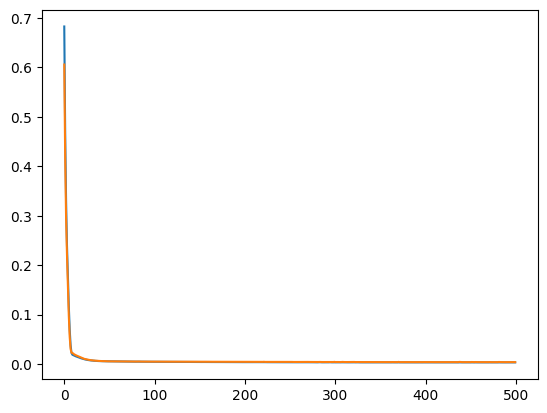

In [73]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

KeyError: 'mae'

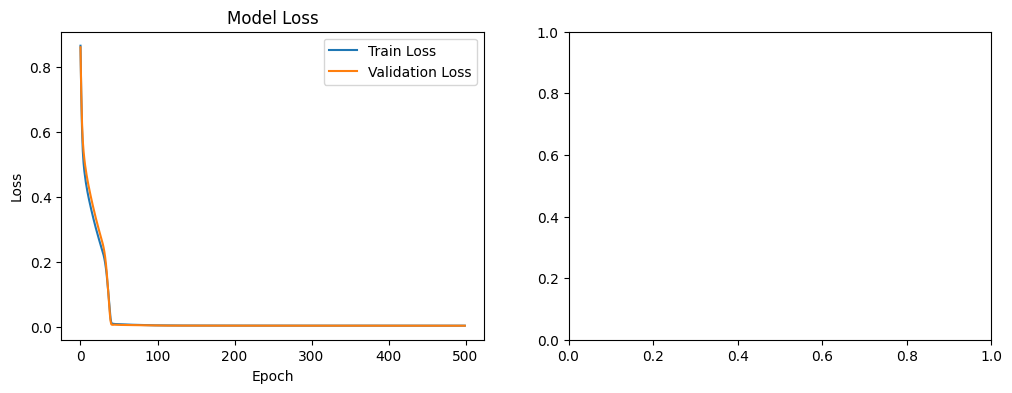

In [20]:
import matplotlib.pyplot as plt

# Plotting training & validation metrics
plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Plot training & validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='best')

# Show the plots
plt.show()
